In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Bengaluru_House_Data.csv')

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape #print the shape of data

(13320, 9)

In [ ]:
data.info() # print the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#**prints the frequency of each unique value in that column**

In [ ]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [ ]:
data.isna().sum() #check how many null values

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
#drop useless data
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [ ]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [ ]:
data.info() # after droping the extra columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [ ]:
data['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [ ]:
data['location'] = data['location'].fillna('Sarjapur Road')  #filling 1 the missing value in location

In [ ]:
data['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


#**replace the missing values with 2BHK because it is max**

In [ ]:
data['size'] = data['size'].fillna('2 BHK')

#**replace the missing bath values with median**

In [ ]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [ ]:
data.info() #now we don't have null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


#**fixing the size column because it has BHK and Bedroom**
processes the 'size' column of a Pandas DataFrame called `data` to extract the number of bedrooms (BHK) and create a new integer column named 'bhk'

In [ ]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [ ]:
data.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


#**checking for outlier in BHK**

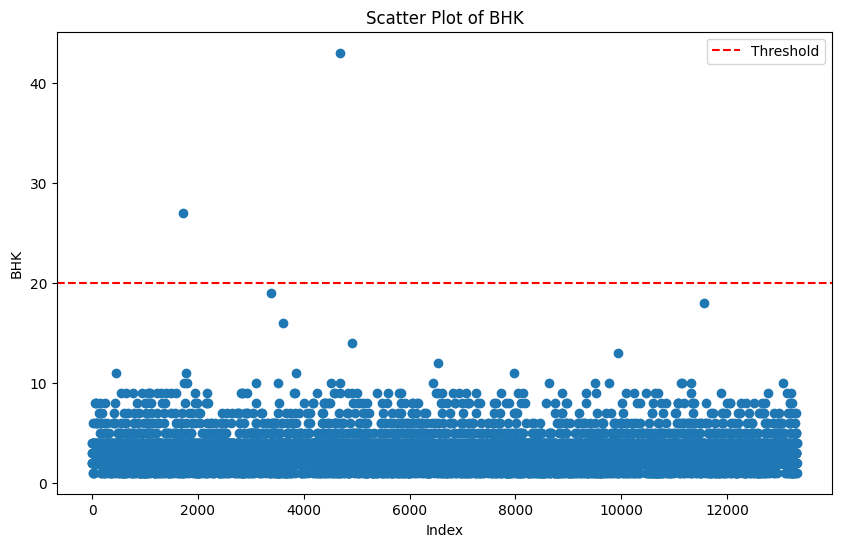

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data.index, data.bhk)
plt.title('Scatter Plot of BHK')
plt.xlabel('Index')
plt.ylabel('BHK')
plt.axhline(y=20, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()

In [ ]:
data[data.bhk > 20] #outliers in data because bhk is very high

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#**fix (1133 - 1384)this type of ranges in total_sqft take every value and split and take a mean as a value**

In [ ]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
data['total_sqft']=data['total_sqft'].apply(convertRange) #apply above function on total_sqft column

In [ ]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


#**calculates the price per square foot for each property in the DataFrame `data` and stores it in a new column named 'price_per_sqft'**

In [ ]:
data['price_per_sqft'] = data['price'] *100000 / data['total_sqft']

In [ ]:
data['price_per_sqft']

,price_per_sqft
0,3699.810606
1,4615.384615
2,4305.555556
3,6245.890861
4,4250.000000
...,...
13315,6689.834926
13316,11111.111111
13317,5258.545136
13318,10407.336319


#**check the new column is created**

In [ ]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
data['location'].value_counts() #check the location values we have to reduce those are less we have to replace

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1
singapura paradise,1


In [ ]:
data['location'] = data['location'].apply(lambda x: x.strip())#removes whitespace characters (spaces, tabs, newlines) from the beginning and end of the string
location_count = data['location'].value_counts()#calculates the frequency of each unique location in the 'location' column.

In [ ]:
location_count

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
1Channasandra,1
Hosahalli,1
Vijayabank bank layout,1


#**those location whose count is less then or equal to 10**

In [ ]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

,count
location,
BTM 1st Stage,10
Nagadevanahalli,10
Basapura,10
Sector 1 HSR Layout,10
Dairy Circle,10
...,...
1Channasandra,1
Hosahalli,1
Vijayabank bank layout,1


#**change this location to other**

In [ ]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [ ]:
data['location'].value_counts()

,count
location,
other,2886
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Nehru Nagar,11
Banjara Layout,11
LB Shastri Nagar,11


In [ ]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


#**calculates the descriptive statistics of the ratio between the total square footage (`total_sqft`) and the number of bedrooms (`bhk`) for each property in the DataFrame `data`.**

In [ ]:
(data['total_sqft']/data['bhk']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


#**keep only those whose total_sqft/bhk is grater then 300 and remove others because those are not usefull**

We're removing rows where `total_sqft/bhk` is less than 300 because these data points likely represent outliers or errors in the dataset.  A very small `total_sqft` relative to the number of bedrooms (`bhk`) suggests an unrealistic or improbable property.  For example, a 2 BHK apartment with only 100 sq ft total area is highly unlikely to exist.  These outliers could skew the model's learning and predictions, so they are removed to improve the accuracy and reliability of the analysis.


In [ ]:
data = data[((data['total_sqft']//data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [ ]:
data.shape

(12530, 7)

In [ ]:
data.price_per_sqft.describe()

,price_per_sqft
count,12530.000000
mean,6303.979357
std,4162.237981
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


#**function for remove the outlier in price_per_sqft which is max = 176470.588235 not possible**

In [ ]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output
data = remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


#**function to remove outliers in bhk column**

In [ ]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [ ]:
data=bhk_outlier_remover(data)

In [ ]:
data.shape

(7361, 7)

In [ ]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


#**remove size and price_per_sqft column**

In [ ]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

In [ ]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


#**save this clean data in Cleaned_data.csv**

In [ ]:
data.to_csv("Cleaned_data.csv")

#**preparing the data for a machine learning model specifically for a supervised learning task where the goal is to predict the 'price'**

removes the 'price' column
`X` now contains all the features (independent variables) that will be used to predict the price.  In essence, it's creating the input features for your model.

This `y` represents the target variable (dependent variable) – the value we want the model to learn how to predict.

In [ ]:
X=data.drop(columns=['price'])
y=data['price']

1. train_test_split : Splits the dataset into training and testing sets.
2. LinearRegression: A basic linear regression model.

   Lasso: Linear regression with L1 regularization (helps with feature selection).

   Ridge: Linear regression with L2 regularization (helps with preventing overfitting by penalizing large coefficients).
3. OneHotEncoder : Converts categorical variables into a format that can be
   provided to ML algorithms to do a better job in prediction.
4. StandardScaler : Standardizes features by removing the mean and scaling to
   unit variance.
   Helps in scaling numerical features for better model performance.
5. make_column_transformer : Applies transformations to specific columns of the
   dataset.
   Helps to preprocess different types of data (numerical vs categorical) differently.
6. make_pipeline : Chains multiple steps (like scaling, encoding, and model
   fitting) into a single object.
   Simplifies the process of applying transformations and fitting the model.
7. Pipeline (alternate to make_pipeline) : Similar to make_pipeline, but allows
   more customization by naming each step explicitly.
8. r2_score : Evaluates the performance of a regression model.
   Returns the coefficient of determination 𝑅^2 indicating how well the model explains the variability of the target variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# splits your data into training and testing sets.


X: Your feature data (all columns except 'price' in your case).

y: Your target variable (the 'price' column).

train_test_split: A function from scikit-learn that randomly divides your data.
test_size=0.2: Specifies that 20% of the data should be used for testing, and the remaining 80% for training.

random_state = 0: Sets a seed for the random number generator. This ensures that the split is reproducible.  If you run the code again with the same random_state, you'll get the exact same train/test split.  Without this, the split will be different each time, which can make comparisons difficult.


# The result:

X_train: The features for the training set.

X_test: The features for the testing set.

y_train: The target variable ('price') for the training set.

y_test: The target variable ('price') for the testing set.

In essence, you now have two separate datasets: one for training your machine learning model and another for evaluating its performance on unseen data. This helps avoid overfitting (where the model performs well on the training data but poorly on new data).

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5888, 4)
(1473, 4)


# Example 1: Histogram of property prices

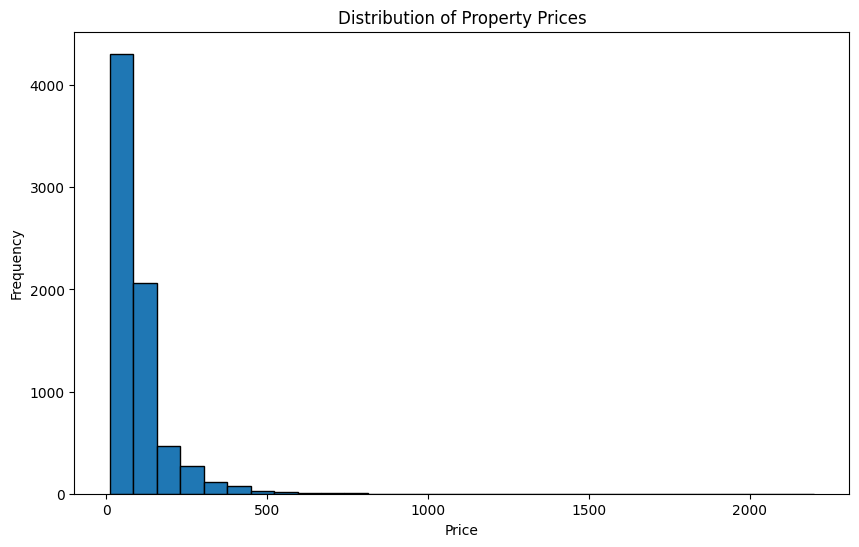

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

- Skewed Distribution: The distribution is heavily right-skewed.
This skewness indicates that most properties are priced at a lower range, while there are fewer properties with high prices.

- Frequency Peaks at Low Prices: The first few bars represent a large number of properties with low prices, as seen by the high frequency (over 4000 properties in the first bar).

- Outliers: The histogram shows a few bars extending to the right, representing properties with higher prices (500, 1000, 1500, and above). These are much less frequent and may represent outliers in the data.

- Rare High-Value Properties: Beyond around 500, the frequency of properties drops significantly, indicating that very high-priced properties are rare in this dataset.

# Example 2: Scatter plot of total_sqft vs. price

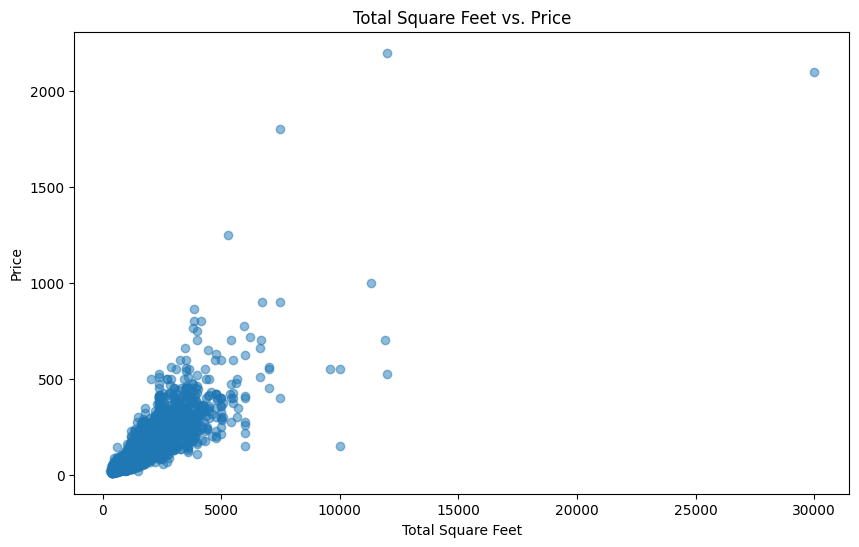

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['total_sqft'], data['price'], alpha=0.5) # alpha for transparency
plt.title('Total Square Feet vs. Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

- Dense Cluster at Lower Values: The majority of properties are clustered in the lower left, with Total Square Feet below 5000 and Price below 500.

- Outliers: There are a few data points that deviate significantly from the main cluster:

- Positive Correlation: The plot shows a general positive trend, indicating that as the total square footage increases, the price also tends to increase.

# Example 3: Box plot of prices by location (top 10 locations)

<Figure size 1200x600 with 0 Axes>

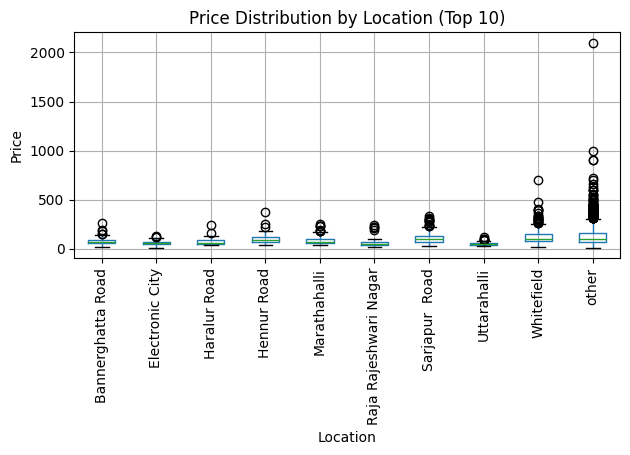

In [ ]:
top_locations = data['location'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
data[data['location'].isin(top_locations)].boxplot(column='price', by='location', rot=90)
plt.title('Price Distribution by Location (Top 10)')
plt.suptitle('') # remove default suptitle
plt.xlabel('Location')
plt.ylabel('Price')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#Creates a column transformer that applies OneHotEncoding to the 'location' column and passes through all other columns.

# Explanation:
1. `make_column_transformer`: This function creates a column transformer that allows you to apply different transformations to different columns of your dataset.

2. `(OneHotEncoder(sparse_output=False), ['location'])`: This part specifies that the `OneHotEncoder` should be applied to the 'location' column.
 `sparse_output=False` ensures the output of the encoder is a dense array (a regular NumPy array) rather than a sparse matrix.  One-hot encoding is used to represent categorical data (like locations) as numerical data that machine learning algorithms can understand. It creates new binary columns for each unique location.

3. `remainder='passthrough'`:  This is crucial. It indicates that any columns not specified in the transformer (all columns other than 'location') should be passed through without any transformation.  This is important because you typically have a mix of categorical and numerical features in your data, and you don't want to apply one-hot encoding to all of them.

# This column transformer prepares your data for a machine learning model by converting the 'location' column into a suitable numerical representation using one-hot encoding and leaving other columns unchanged. This is a common preprocessing step in machine learning pipelines.

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']),
                                      remainder='passthrough')

`StandardScaler` standardizes features by removing the mean and scaling to unit variance.  This ensures that features with larger values don't disproportionately influence the model, and it often improves the performance and convergence of algorithms like linear regression.

`LinearRegression` to build a linear regression model.  Linear regression models the relationship between the input features (after normalization in this case) and the target variable as a linear equation.


#Use of pipeline :
A pipeline chains together multiple data transformation steps and a final estimator (like a machine learning model).  

It simplifies the process of applying a sequence of operations to your data, making your code cleaner and preventing data leakage (where information from the test set inadvertently influences the training process).  

In this pipeline first applies `OneHotEncoder` to the 'location' column and then scales all the features using `StandardScaler` before feeding the data into a `LinearRegression` model.


In [ ]:
#scaler = StandardScaler()
# Create a pipeline with StandardScaler for normalization and LinearRegression for modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # This handles normalization
    ('lr', LinearRegression())     # Linear regression model
])

In [ ]:
lr = LinearRegression()

In [ ]:
scaler = StandardScaler()

# 1. column_trans:  This is a ColumnTransformer that applies OneHotEncoding to the 'location' column and leaves the rest of the columns unchanged. OneHotEncoding converts categorical variables (like location names) into numerical representations that machine learning models can understand.

# 2. scaler:  This is a StandardScaler that standardizes the features by removing the mean and scaling to unit variance.  Feature scaling is often crucial for algorithms like linear regression, as it prevents features with larger values from dominating the model's learning.

# 3. lr: This is a LinearRegression model, the final estimator in the pipeline. It learns a linear relationship between the input features and the target variable (price in this case).

In [ ]:
pipe = make_pipeline(column_trans, scaler, lr)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

The predicted 'price' values are stored in the `y_pred_lr` variable.  This variable now contains the model's predictions for the houses in the test set.

# The `predict()` method of the pipeline takes the test data (`X_test`) as input.
The pipeline then performs the following steps on X_test:
- Applies the `column_trans` (one-hot encoding) to the 'location' feature in the test set.
- Applies the `scaler` (standardization) to all the features (including the one-hot encoded 'location' feature).
- Feeds the scaled features into the trained `lr` model.
- The `lr` model generates predictions for the 'price' based on the scaled and encoded features.

In [ ]:
y_pred_lr = pipe.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_lr)

0.8233582685621736

In [ ]:
lasso = Lasso()

In [ ]:
pipe = make_pipeline(column_trans,scaler, lasso)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.8128285650772719

In [ ]:
ridge = Ridge()

In [ ]:
pipe = make_pipeline(column_trans,scaler, ridge)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8234146633312639

In [ ]:
print("No Reggularization: ", r2_score(y_test, y_pred_lr))
print("Lasso: ", r2_score(y_test, y_pred_lasso))
print("Ridge: ", r2_score(y_test, y_pred_ridge))

No Reggularization:  0.8233582685621736
Lasso:  0.8128285650772719
Ridge:  0.8234146633312639


#**comparing the R2 scores of the three regression models.**

In [ ]:
r2_scores = {
    'No Regularization': r2_score(y_test, y_pred_lr),
    'Lasso': r2_score(y_test, y_pred_lasso),
    'Ridge': r2_score(y_test, y_pred_ridge)
}

r2_df = pd.DataFrame({'Model': list(r2_scores.keys()), 'R2 Score': list(r2_scores.values())})

# Find the best model based on R2 score
best_model = r2_df.loc[r2_df['R2 Score'].idxmax()]

# Display the table
print(r2_df)
print("\nBest Performing Model:")
best_model

               Model  R2 Score
0  No Regularization  0.823358
1              Lasso  0.812829
2              Ridge  0.823415

Best Performing Model:


,2
Model,Ridge
R2 Score,0.823415


#**Regression Evaluation Metrics**

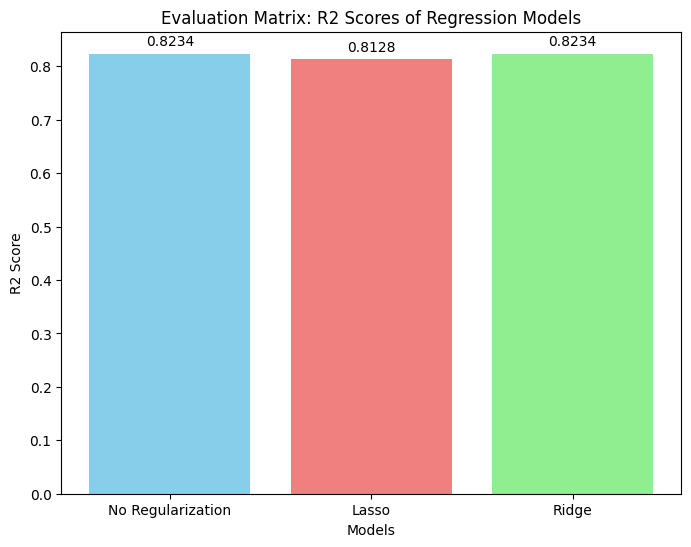

In [ ]:
import matplotlib.pyplot as plt

r2_scores = {
    'No Regularization': r2_score(y_test, y_pred_lr),
    'Lasso': r2_score(y_test, y_pred_lasso),
    'Ridge': r2_score(y_test, y_pred_ridge)
}

models = list(r2_scores.keys())
scores = list(r2_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Evaluation Matrix: R2 Scores of Regression Models")

# Add the R2 score value on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center', va='bottom')

plt.show()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")
print(f"Lasso Regression - MAE: {mae_lasso:.2f}, RMSE: {rmse_lasso:.2f}")
print(f"Ridge Regression - MAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}")

Linear Regression - MAE: 18.18, RMSE: 35.60
Lasso Regression - MAE: 19.46, RMSE: 36.65
Ridge Regression - MAE: 18.17, RMSE: 35.60


In [79]:
import pickle
pickle.dump(pipe,open('RidgeModel.pkl','wb'))